In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("/kaggle/input/healthcare-dataset/healthcare_dataset.csv")
print(df)

                      Name  Age  Gender Blood Type Medical Condition  \
0          Tiffany Ramirez   81  Female         O-          Diabetes   
1              Ruben Burns   35    Male         O+            Asthma   
2                Chad Byrd   61    Male         B-           Obesity   
3        Antonio Frederick   49    Male         B-            Asthma   
4      Mrs. Brandy Flowers   51    Male         O-         Arthritis   
...                    ...  ...     ...        ...               ...   
9995            James Hood   83    Male         A+           Obesity   
9996       Stephanie Evans   47  Female        AB+         Arthritis   
9997  Christopher Martinez   54    Male         B-         Arthritis   
9998           Amanda Duke   84    Male         A+         Arthritis   
9999             Eric King   20    Male         B-         Arthritis   

     Date of Admission             Doctor                   Hospital  \
0           2022-11-17     Patrick Parker           Wallace-Ham

In [3]:
print("Null Values:")
print(df.isnull().sum())
df.shape

Null Values:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


(10000, 15)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


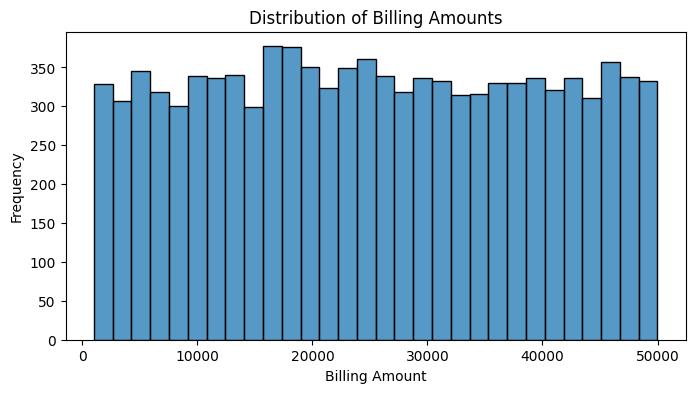

In [4]:
## EXPLORATORY DATA ANALYSIS(EDA)
# Exploring the distribution of billing amounts
plt.figure(figsize=(8, 4))
sns.histplot(df['Billing Amount'], bins=30)
plt.title('Distribution of Billing Amounts')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

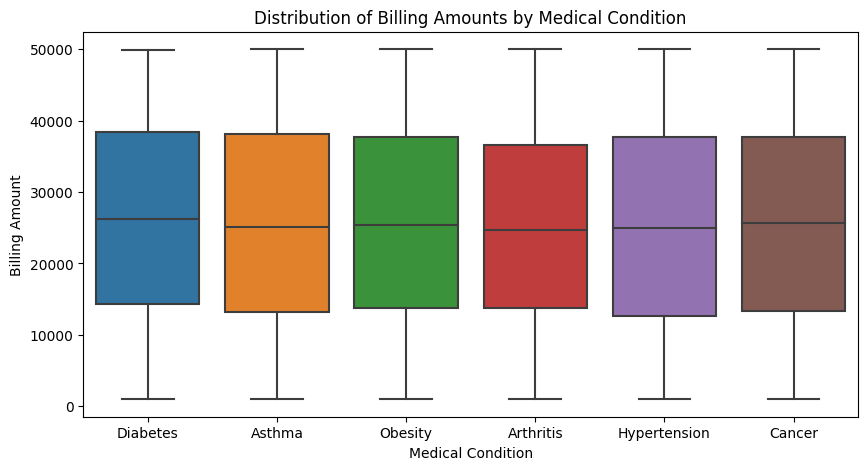

In [5]:
# Analyzing the distribution of medical conditions and their associated costs
plt.figure(figsize=(10, 5))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title('Distribution of Billing Amounts by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.show()


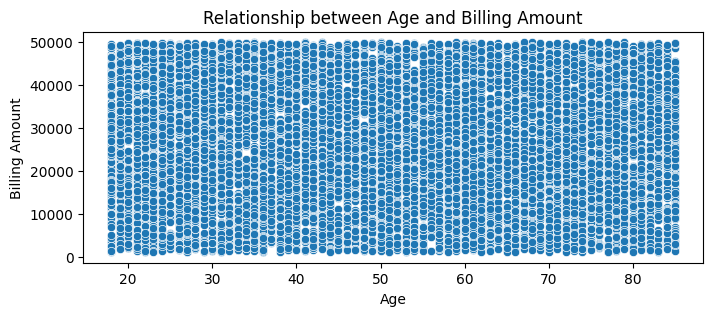

In [6]:
# Examining the relationship between age and billing amount
plt.figure(figsize=(8, 3))
sns.scatterplot(x='Age', y='Billing Amount', data=df)
plt.title('Relationship between Age and Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()

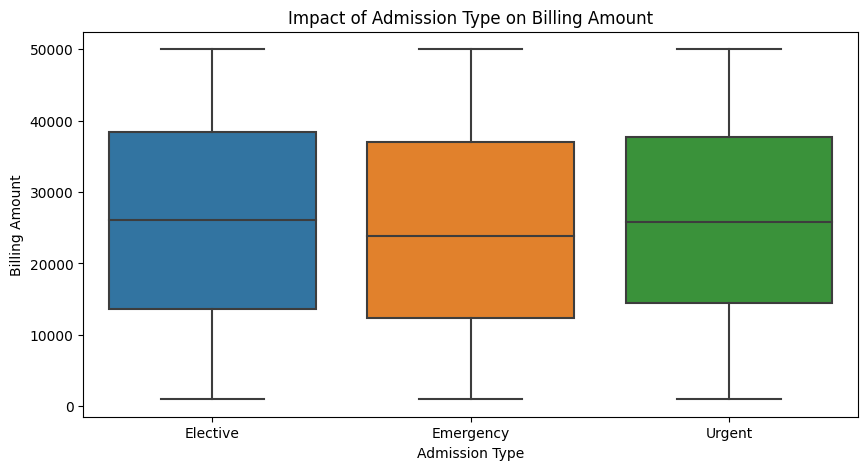

In [7]:
# Investigating the impact of different admission types on billing amounts
plt.figure(figsize=(10, 5))
sns.boxplot(x='Admission Type', y='Billing Amount', data=df)
plt.title('Impact of Admission Type on Billing Amount')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.show()

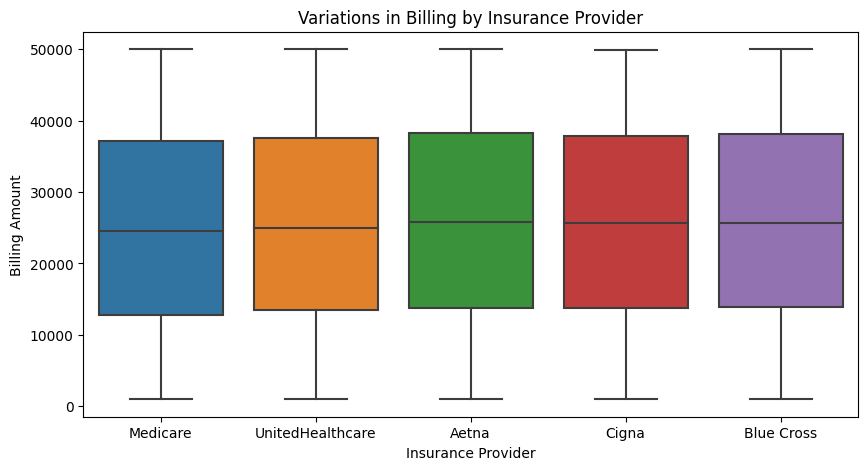

In [8]:
# Looking into insurance provider data to understand variations in billing
plt.figure(figsize=(10, 5))
sns.boxplot(x='Insurance Provider', y='Billing Amount', data=df)
plt.title('Variations in Billing by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Billing Amount')
plt.show()

In [9]:
# FINANCIAL IMPACT ON HEALTHCARE SYSTEM
# Calculating and analyzing the total revenue generated from all admissions
total_revenue = df['Billing Amount'].sum()
print(f'Total Revenue Generated: ${total_revenue:,.2f}')


Total Revenue Generated: $255,168,067.78


In [10]:
# Identifying high-cost medical conditions and their prevalence
high_cost_conditions = df.groupby('Medical Condition')['Billing Amount'].mean().nlargest(5)
print('\nTop 5 High-Cost Medical Conditions:')
print(high_cost_conditions)


Top 5 High-Cost Medical Conditions:
Medical Condition
Diabetes        26060.116129
Obesity         25720.842683
Cancer          25539.096133
Asthma          25416.869895
Hypertension    25198.033973
Name: Billing Amount, dtype: float64


In [11]:
# Assessing the impact of insurance providers on the hospital's finances
insurance_impact = df.groupby('Insurance Provider')['Billing Amount'].mean().nlargest(5)
print('\nTop 5 Insurance Providers Impact on Finances:')
print(insurance_impact)


Top 5 Insurance Providers Impact on Finances:
Insurance Provider
Aetna               25837.923338
Cigna               25656.946859
Blue Cross          25652.489617
UnitedHealthcare    25404.685388
Medicare            25002.480429
Name: Billing Amount, dtype: float64


/tmp/ipykernel_18/3698738647.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Room Number', y='Billing Amount', data=df, ci=None)


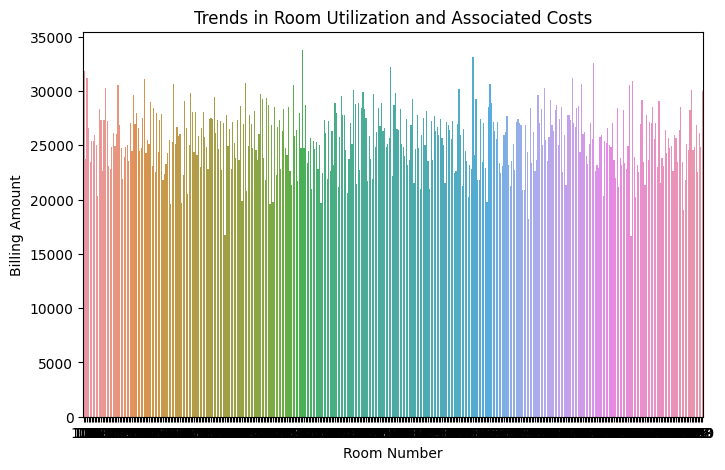

In [12]:
# Exploring trends in room utilization and their associated costs
plt.figure(figsize=(8, 5))
sns.barplot(x='Room Number', y='Billing Amount', data=df, ci=None)
plt.title('Trends in Room Utilization and Associated Costs')
plt.xlabel('Room Number')
plt.ylabel('Billing Amount')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


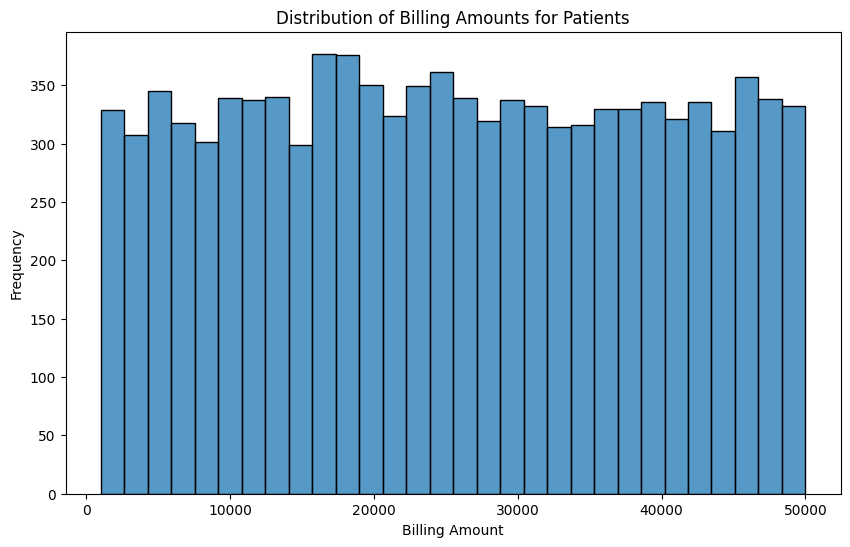

In [13]:
# FINANCIAL IMPACT ON PATIENTS

# Analyze the distribution of billing amounts to understand the financial burden on patients
plt.figure(figsize=(10, 6))
sns.histplot(df['Billing Amount'], bins=30)
plt.title('Distribution of Billing Amounts for Patients')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

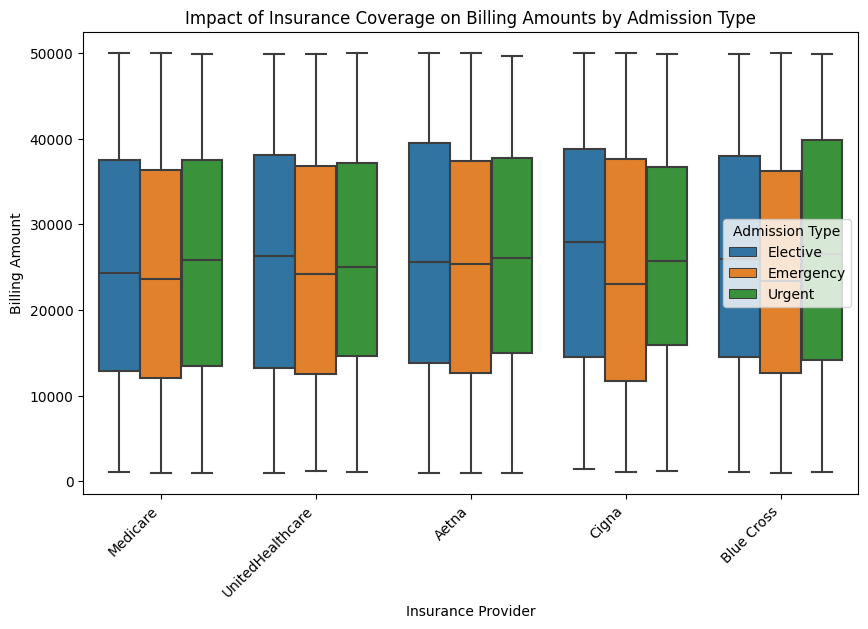

In [14]:
# Examine how insurance coverage affects out-of-pocket expenses
plt.figure(figsize=(10, 6))
sns.boxplot(x='Insurance Provider', y='Billing Amount', hue='Admission Type', data=df)
plt.title('Impact of Insurance Coverage on Billing Amounts by Admission Type')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Insurance Provider')
plt.ylabel('Billing Amount')
plt.show()

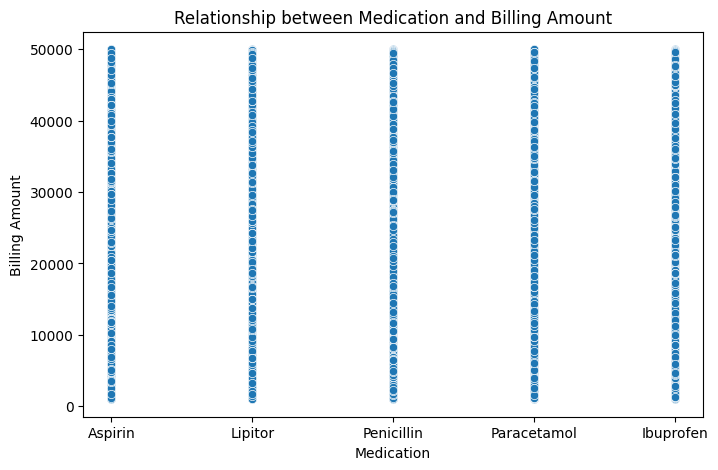

In [15]:
# Investigate the relationship between medication and billing amounts
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Medication', y='Billing Amount', data=df)
plt.title('Relationship between Medication and Billing Amount')
plt.xlabel('Medication')
plt.ylabel('Billing Amount')
plt.show()


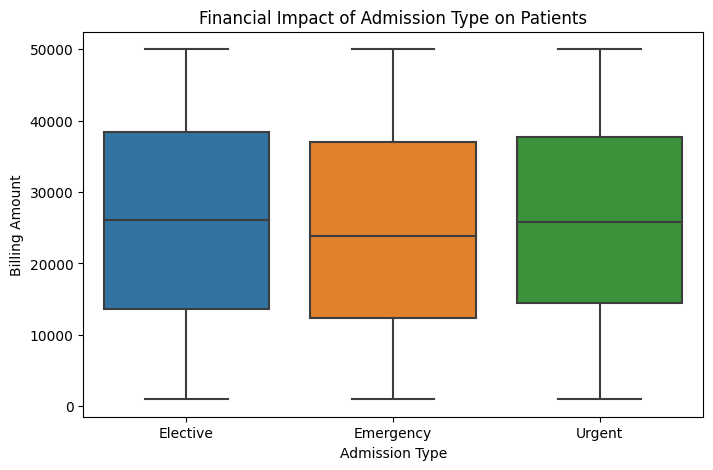

In [16]:
# Explore the financial impact of different admission types on patients
plt.figure(figsize=(8, 5))
sns.boxplot(x='Admission Type', y='Billing Amount', data=df)
plt.title('Financial Impact of Admission Type on Patients')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.show()

In [17]:
# Statistical Analysis to conduct statistical tests to identify significant relationships
correlation_age_billing = df['Age'].corr(df['Billing Amount'])
print(f'\nCorrelation between Age and Billing Amount: {correlation_age_billing:.2f}')




Correlation between Age and Billing Amount: -0.01


In [18]:

# Performing regression analysis to model the factors influencing billing amounts
# Assuming 'Age' is a predictor for 'Billing Amount'
X = df[['Age']]
y = df['Billing Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('\nRegression Coefficients:')
print(f'Intercept: {model.intercept_:.2f}')
print(f'Age Coefficient: {model.coef_[0]:.2f}')




Regression Coefficients:
Intercept: 25945.27
Age Coefficient: -8.95


In [19]:
independent_variables = df[['Medical Condition', 'Admission Type', 'Blood Type', 'Test Results']]
dependent_variable = df['Billing Amount']

mean = dependent_variable.mean()
median = dependent_variable.median()
standard_dev = dependent_variable.std()

print(f"Mean Financial Impact: {mean}")
print(f"Median Financial Impact: {median}")
print(f"Standard Deviation Financial Impact: {standard_dev}")



Mean Financial Impact: 25516.8067777384
Median Financial Impact: 25258.112566373504
Standard Deviation Financial Impact: 14067.2927092262


In [20]:
# Evaluating the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

print(f'\nModel Evaluation:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Model Evaluation:
Mean Absolute Error (MAE): 12276.34
Mean Squared Error (MSE): 199953012.55
Root Mean Squared Error (RMSE): 14140.47
R-squared (R2): -0.00
